In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df2 = pd.read_csv("endurance_michigan_2019-easy_driver.csv")
# plt.scatter(x=df2["x"],y=df2["y"], c=df2["vel"]/70, cmap="viridis")
# plt.title("LETS FUCKING GO")
# # sns.set_style("whitegrid")
# # pal = sns.color_palette("Reds", as_cmap=True)
# # sns.relplot(data=df, x="x", y="y", hue="vel", palette="RdYlBu") #, palette="dark:viridis") #, palette="viridis") # kind="line")
# print("TIME IN SECONDS 1 g-g diagram",df2.loc[df2.shape[0]-1, "time"])

In [2]:
plt.plot(df2["time"], df2["vel"])


NameError: name 'df2' is not defined

In [ ]:
plt.scatter(df2["time"], df2["ay"], label = "AY")
plt.scatter(df2["time"], df2["ax"], label = "AX")
plt.legend()

In [ ]:
df = pd.read_csv("autocross_michigan_2019-easy_driver.csv")
plt.scatter(x=df["x"],y=df["y"], c=df["vel"]/70, cmap="viridis")
print("TIME IN SECONDS 1 g-g diagram",df.loc[df.shape[0]-1, "time"])

In [ ]:
plt.plot(df["pos"], df["vel"])
plt.grid()

In [ ]:
plt.plot(df2["time"], df2["vel"])

In [ ]:
plt.scatter(df["ax"],df["ay"])

In [ ]:
plt.scatter(df["vel"],df["R"])

In [3]:
import sys
sys.path.append("..")
import engine
from engine import racecar
import engine.magic_moment_method.vehicle_params as vehicles
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


easy_driver = engine.Racecar(vehicles.Concept2023(), "../engine/magic_moment_method/analysis/GGV.csv")

endurance_track = engine.Track("../racing_lines/" + "endurance_michigan_2019" + "-racing_line.csv", 1681.963)
endurance_event = engine.Simulation(easy_driver, endurance_track)
endurance_results, time = endurance_event.run()
reverse_sim = endurance_event.reverse_sim


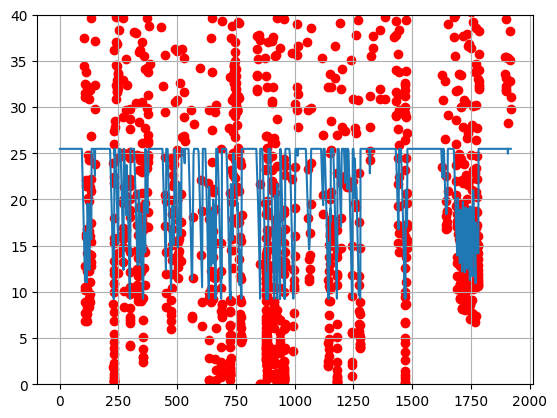

105.30363517320312


In [4]:
# 634.8268839118932
new = reverse_sim.applymap(np.real)
plt.plot(new["pos"], new["vel"])
plt.scatter(new["pos"], new["R"], c='r')
plt.grid()
plt.ylim([0,40])
plt.show()
print(time)

In [ ]:
# 634.8268839118932
new = reverse_sim.applymap(np.real)
plt.plot(new["delta_t"], new["vel"])
plt.scatter(new["delta_t"], new["R"], c='r')
plt.grid()
plt.ylim([0,40])
plt.show()
print(time)

In [ ]:
plt.scatter(new["R"], new["vel"])
plt.ylim([0,3])
plt.xlim([0,5])
plt.ylabel("Velocity")
plt.xlabel("Turn Radius")

In [ ]:
new["R"].sort_values().iloc[:100]


Text(0.5, 1.0, '2019 Michigan Endurance Track')

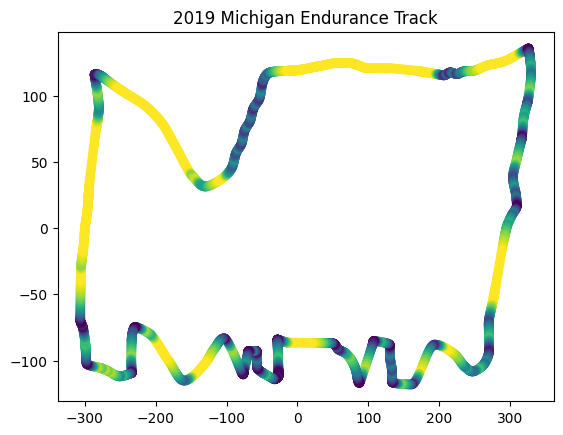

In [12]:
from matplotlib.pyplot import title


endurance_results1 = endurance_event.results.applymap(np.real)
plt.scatter(x=endurance_results1["x"],y=endurance_results1["y"], c=endurance_results1["vel"], cmap="viridis")
plt.title("2019 Michigan Endurance Track")

In [ ]:
df = pd.read_csv("../racing_lines/Endurance_Michigan_2019-racing_line.csv")
df2 = pd.read_csv("../tracks/Endurance_Michigan_2019_CONES_ONLY.csv")
plt.plot(df["x"], df["y"])
df2["x"] += 61.71
df2["y"] += 20.92
print(sum(endurance_results1["dist"]))
plt.scatter(df2["x"], df2["y"])